In [8]:
import os
import sys
import subprocess
import numpy as np
# import glob
import json
import pandas as pd
import shutil
import librosa.display
# from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import csv
import IPython.display as ipd
import random

In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimsunhee","key":"5d873ecbd75fa0fb5ee4a42d5e533f5d"}'}

In [470]:
ls -1ha kaggle.json

kaggle.json


In [471]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         50           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         80           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        560           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        108           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1126           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13359           False  
house-pr

In [5]:
!kaggle datasets download -d sarabhian/coswara-dataset-heavy-cough

100% 630M/632M [00:27<00:00, 20.3MB/s]
100% 632M/632M [00:27<00:00, 24.5MB/s]


In [472]:
ls

coswara_data/                    drive/         train2.csv
coswara-dataset-heavy-cough.zip  kaggle.json    train.csv
csvs/                            pytorch-mfcc/  train_original.csv
data_new_extended.csv            sample_data/


In [7]:
!unzip coswara-dataset-heavy-cough.zip

Archive:  coswara-dataset-heavy-cough.zip
  inflating: coswara_data/kaggle_data/00xKcQMmcAhX8CODgBBLOe7Dm0T2/cough.wav  
  inflating: coswara_data/kaggle_data/01OCEf1yB4czsq8ygRoT51s96Ba2/cough.wav  
  inflating: coswara_data/kaggle_data/01n0u9YSkXQSkmN45J65eigyCMC3/cough.wav  
  inflating: coswara_data/kaggle_data/03TmwzsdEBVEh35MRMbC9d0NnfI3/cough.wav  
  inflating: coswara_data/kaggle_data/05acPS4aRGfvuOfku11Za8zve8i2/cough.wav  
  inflating: coswara_data/kaggle_data/05bieNLXPuaIWEVaX81EkbbjVrh1/cough.wav  
  inflating: coswara_data/kaggle_data/08tlSbvXpAggZavIGW994adhh1m1/cough.wav  
  inflating: coswara_data/kaggle_data/0B1rE91KabdId1lUmWJB7NLg8OP2/cough.wav  
  inflating: coswara_data/kaggle_data/0EAAFsDWfTcrhktHy78LS6nf19G3/cough.wav  
  inflating: coswara_data/kaggle_data/0HIgO2EhOOW1msCbEw1kC8Qsx6D3/cough.wav  
  inflating: coswara_data/kaggle_data/0Ha52POVIxTKEPqI1eGpIoMHUd52/cough.wav  
  inflating: coswara_data/kaggle_data/0Js6ZUZQ9NUnu568Fh7B6mZ1R8o1/cough.wav  
  inflatin

In [473]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/YrJHnx1PgzPLiCgkSLaQqMhyBeA2/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/YuahWhZmLgMcw3hpc83mcz06bMS2/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/YvhPqG9MqhbjHErOmOctaNdVdJZ2/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/YwhRHergRUamkPHHq2Vo5LA0WIw1/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/YzKbMCpZxMRoab1o1d03S6e8T5P2/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/Z0JZ3bVzYZcEx2GkbTKAyWbyC2J3/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/Z5Y8ewskqQWeyIFkqRKuwGz9fCv1/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/Z6qimRi4c2NDdPHsocMRk9IlgdH2/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/Z7ZMrrVuJKSK1JEfLQjxGXI1VTq1/cough.wav
/content/d

In [9]:
!cp -r /content/drive/MyDrive/Colab Notebooks/sesac /csvs

cp: target '/csvs' is not a directory


In [474]:
data_path = "/content/coswara_data/kaggle_data"
csvs_path = "./csvs"

In [475]:
hcough_files =[]
for dirpath, subdirs, files in os.walk(data_path):
#     print(files)
    hcough_files.extend(os.path.join(dirpath, x) for x in files if os.path.isfile(os.path.join(dirpath, x)))
print("total files :" ,len(hcough_files)) 
print("path of file at loc [0] :" ,hcough_files[0]) # path of file
print("id of file at loc[0]",hcough_files[0][-38:-10] )# id of each file

dff = pd.DataFrame(columns=['id','path'])
dff['path']=hcough_files 
dff['id'] = dff.path.apply(lambda x: x[-38:-10])
dff.head()

total files : 2313
path of file at loc [0] : /content/coswara_data/kaggle_data/PWXapCML3JSGefaCRAxKjCNp0Ps2/cough.wav
id of file at loc[0] PWXapCML3JSGefaCRAxKjCNp0Ps2


id  \
0  PWXapCML3JSGefaCRAxKjCNp0Ps2   
1  CEn02KlCBsUgUqUmf5BfUgaITG33   
2  naPVzGoHqwfHo3PNVfoNxMpR7qU2   
3  lRsw8buO7jQSHGzSWIOPW5JboM82   
4  OK2CZltrvfZbpTWB75LWMFqxfpM2   

                                                path  
0  /content/coswara_data/kaggle_data/PWXapCML3JSG...  
1  /content/coswara_data/kaggle_data/CEn02KlCBsUg...  
2  /content/coswara_data/kaggle_data/naPVzGoHqwfH...  
3  /content/coswara_data/kaggle_data/lRsw8buO7jQS...  
4  /content/coswara_data/kaggle_data/OK2CZltrvfZb...

In [476]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [477]:
data = librosa.load(dff.path.loc[1],sr = 22050)
ipd.Audio(dff.path.loc[1])

In [478]:
csv_files =[]
for dirpath, subdirs, files in os.walk(csvs_path):
    csv_files.extend(os.path.join(dirpath, x) for x in files if x.endswith(".csv"))
csv_files

['./csvs/20210816.csv',
 './csvs/20201012.csv',
 './csvs/20201031.csv',
 './csvs/20210523.csv',
 './csvs/20210630.csv',
 './csvs/20200820.csv',
 './csvs/20200424.csv',
 './csvs/20200604.csv',
 './csvs/20210603.csv',
 './csvs/20200720.csv',
 './csvs/20200430.csv',
 './csvs/20200930.csv',
 './csvs/20200814.csv',
 './csvs/20200505.csv',
 './csvs/20201130.csv',
 './csvs/20200911.csv',
 './csvs/20220116.csv',
 './csvs/20210406.csv',
 './csvs/20200707.csv',
 './csvs/20200502.csv',
 './csvs/20200416.csv',
 './csvs/20210426.csv',
 './csvs/20210914.csv',
 './csvs/20201221.csv',
 './csvs/20200919.csv',
 './csvs/20200525.csv',
 './csvs/20210618.csv',
 './csvs/20200803.csv',
 './csvs/20210830.csv',
 './csvs/20210507.csv',
 './csvs/20200901.csv',
 './csvs/20200419.csv',
 './csvs/20210930.csv',
 './csvs/20210714.csv',
 './csvs/20200417.csv',
 './csvs/20210419.csv',
 './csvs/20200418.csv',
 './csvs/20210206.csv',
 './csvs/20200824.csv',
 './csvs/20200413.csv',
 './csvs/20200415.csv',
 './csvs/2020050

In [15]:
pwd

'/content'

In [479]:
print("total present csvs :", len(os.listdir(csvs_path)))

total present csvs : 43


In [480]:
all_files=[]
for files in os.listdir(csvs_path):
    if files[-3:]=="csv":
        all_files.append(files)
all_files.sort()
all_files

['20200413.csv',
 '20200415.csv',
 '20200416.csv',
 '20200417.csv',
 '20200418.csv',
 '20200419.csv',
 '20200424.csv',
 '20200430.csv',
 '20200502.csv',
 '20200504.csv',
 '20200505.csv',
 '20200525.csv',
 '20200604.csv',
 '20200707.csv',
 '20200720.csv',
 '20200803.csv',
 '20200814.csv',
 '20200820.csv',
 '20200824.csv',
 '20200901.csv',
 '20200911.csv',
 '20200919.csv',
 '20200930.csv',
 '20201012.csv',
 '20201031.csv',
 '20201130.csv',
 '20201221.csv',
 '20210206.csv',
 '20210406.csv',
 '20210419.csv',
 '20210426.csv',
 '20210507.csv',
 '20210523.csv',
 '20210603.csv',
 '20210618.csv',
 '20210630.csv',
 '20210714.csv',
 '20210816.csv',
 '20210830.csv',
 '20210914.csv',
 '20210930.csv',
 '20220116.csv']

In [481]:
os.chdir(csvs_path)

df_list =[]
for i in range(len(all_files)):
    temp_df = pd.read_csv(all_files[i])
    df_list.append(temp_df)
df = pd.concat(df_list, ignore_index=True, sort=False)
df.head()

id    l_c   a record_date covid_status    iF ep  \
0  vK2bLRNzllXNeyOMudnNSL5cfpG2  India  24  2020-04-13      healthy  True  y   
1  bjA2KpSxneNskrLBeqi4bqoTDQl2  India  72  2020-04-13      healthy  True  y   
2  FSzobvJqOXf0rI6X05cHqOiU9Mu2  India  54  2020-04-13      healthy  True  y   
3  EqDWckxbsETyHUeBLQ8jLtxlhir2  India  31  2020-04-13      healthy  True  y   
4  FGRDO4IBbAejR0WHD5YbkXTCasg2  India  26  2020-04-13      healthy  True  y   

      g          l_s   dT  ... test_status diarrhoea ctScan vacc testType  \
0  male    Karnataka  web  ...         NaN       NaN    NaN  NaN      NaN   
1  male  Maharashtra  web  ...         NaN       NaN    NaN  NaN      NaN   
2  male  Maharashtra  web  ...         NaN       NaN    NaN  NaN      NaN   
3  male    Karnataka  web  ...         NaN       NaN    NaN  NaN      NaN   
4  male      Haryana  web  ...         NaN       NaN    NaN  NaN      NaN   

  test_date others_preexist ctDate ctScore  others_resp  
0       NaN             NaN    NaN     NaN          NaN  
1       NaN             NaN    NaN     NaN          NaN  
2       NaN             NaN    NaN     NaN          NaN  
3       NaN             NaN    NaN     NaN          NaN  
4       NaN             NaN    NaN     NaN          NaN  

[5 rows x 41 columns]

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2374 non-null   object 
 1   l_c              2374 non-null   object 
 2   a                2374 non-null   int64  
 3   record_date      2374 non-null   object 
 4   covid_status     2374 non-null   object 
 5   iF               76 non-null     object 
 6   ep               2374 non-null   object 
 7   g                2374 non-null   object 
 8   l_s              2374 non-null   object 
 9   dT               1770 non-null   object 
 10  l_l              2113 non-null   object 
 11  diabetes         196 non-null    object 
 12  asthma           119 non-null    object 
 13  smoker           714 non-null    object 
 14  ht               193 non-null    object 
 15  fever            264 non-null    object 
 16  date             604 non-null    object 
 17  cld           

In [483]:
df['str_date']=pd.to_datetime(df['record_date'])
df['date']=df['str_date'].dt.strftime('%Y%m%d')
df.head(10)

id     l_c   a record_date  \
0  vK2bLRNzllXNeyOMudnNSL5cfpG2   India  24  2020-04-13   
1  bjA2KpSxneNskrLBeqi4bqoTDQl2   India  72  2020-04-13   
2  FSzobvJqOXf0rI6X05cHqOiU9Mu2   India  54  2020-04-13   
3  EqDWckxbsETyHUeBLQ8jLtxlhir2   India  31  2020-04-13   
4  FGRDO4IBbAejR0WHD5YbkXTCasg2   India  26  2020-04-13   
5  htQzROl26OWQpIYFDzv11F79PLR2   India  24  2020-04-13   
6  pW9mCAeWYiMoM7wW7riLvNRbYDO2   India  37  2020-04-13   
7  Eu11s84cuBTiPXTAtVf9mj3GkqA2  Canada  23  2020-04-13   
8  L7S8iIPKgiO6QWLC3mGkROCMa0s1   India  40  2020-04-13   
9  eP8gEM0KcBU6S5JpMdycX74KP3p2   India  32  2020-04-13   

                  covid_status    iF ep     g          l_s   dT  ...  \
0                      healthy  True  y  male    Karnataka  web  ...   
1                      healthy  True  y  male  Maharashtra  web  ...   
2                      healthy  True  y  male  Maharashtra  web  ...   
3                      healthy  True  y  male    Karnataka  web  ...   
4                      healthy  True  y  male      Haryana  web  ...   
5                      healthy  True  y  male    Karnataka  web  ...   
6                      healthy  True  y  male  Maharashtra  web  ...   
7                      healthy  True  y  male      Ontario  web  ...   
8  resp_illness_not_identified  True  y  male      Gujarat  web  ...   
9                      healthy  True  y  male    Telangana  web  ...   

  diarrhoea ctScan vacc testType test_date others_preexist ctDate ctScore  \
0       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
1       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
2       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
3       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
4       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
5       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
6       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
7       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
8       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
9       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   

  others_resp   str_date  
0         NaN 2020-04-13  
1         NaN 2020-04-13  
2         NaN 2020-04-13  
3         NaN 2020-04-13  
4         NaN 2020-04-13  
5         NaN 2020-04-13  
6         NaN 2020-04-13  
7         NaN 2020-04-13  
8         NaN 2020-04-13  
9         NaN 2020-04-13  

[10 rows x 42 columns]

In [484]:
tdf = pd.merge(dff ,df , on = 'id')
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 0 to 2311
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               2312 non-null   object        
 1   path             2312 non-null   object        
 2   l_c              2312 non-null   object        
 3   a                2312 non-null   int64         
 4   record_date      2312 non-null   object        
 5   covid_status     2312 non-null   object        
 6   iF               76 non-null     object        
 7   ep               2312 non-null   object        
 8   g                2312 non-null   object        
 9   l_s              2312 non-null   object        
 10  dT               1708 non-null   object        
 11  l_l              2061 non-null   object        
 12  diabetes         194 non-null    object        
 13  asthma           116 non-null    object        
 14  smoker           652 non-null    object 

In [485]:
tdf.head()

id  \
0  PWXapCML3JSGefaCRAxKjCNp0Ps2   
1  CEn02KlCBsUgUqUmf5BfUgaITG33   
2  naPVzGoHqwfHo3PNVfoNxMpR7qU2   
3  lRsw8buO7jQSHGzSWIOPW5JboM82   
4  OK2CZltrvfZbpTWB75LWMFqxfpM2   

                                                path    l_c   a record_date  \
0  /content/coswara_data/kaggle_data/PWXapCML3JSG...  India  54  2020-04-26   
1  /content/coswara_data/kaggle_data/CEn02KlCBsUg...  India  44  2020-08-11   
2  /content/coswara_data/kaggle_data/naPVzGoHqwfH...  India  28  2021-04-14   
3  /content/coswara_data/kaggle_data/lRsw8buO7jQS...  India  33  2021-07-10   
4  /content/coswara_data/kaggle_data/OK2CZltrvfZb...  India  47  2020-05-04   

              covid_status   iF ep       g          l_s  ... diarrhoea ctScan  \
0                  healthy  NaN  y  female       Kerala  ...       NaN    NaN   
1                  healthy  NaN  y    male    Karnataka  ...       NaN    NaN   
2  no_resp_illness_exposed  NaN  y  female  Maharashtra  ...       NaN    NaN   
3            positive_mild  NaN  y    male    Karnataka  ...       NaN      n   
4                  healthy  NaN  y    male   Tamil Nadu  ...       NaN    NaN   

  vacc testType   test_date others_preexist ctDate ctScore others_resp  \
0  NaN      NaN         NaN             NaN    NaN     NaN         NaN   
1  NaN      NaN         NaN             NaN    NaN     NaN         NaN   
2  NaN      NaN         NaN             NaN    NaN     NaN         NaN   
3    p    rtpcr  2021-07-07             NaN    NaN     NaN         NaN   
4  NaN      NaN         NaN             NaN    NaN     NaN         NaN   

    str_date  
0 2020-04-26  
1 2020-08-11  
2 2021-04-14  
3 2021-07-10  
4 2020-05-04  

[5 rows x 43 columns]

In [487]:
tdf.to_csv('tdf.csv',index=False)

In [9]:
tdf=pd.read_csv('/content/csvs/tdf.csv')

In [10]:
data = librosa.load(tdf.path.loc[1343],sr =22050)
ipd.Audio(tdf['path'].loc[1343])

In [11]:
df = tdf.copy()
df['status']=0
for i in range(0,2312):
    if ((df.covid_status.loc[i]!='positive_mild') or (df.covid_status.loc[i]!='positive_moderate') or (df.covid_status.loc[i]!='positive_asymp')):
        df["status"].loc[i]='negative'
    
    if ((df.covid_status.loc[i]=='positive_mild') or (df.covid_status.loc[i]=='positive_moderate') or (df.covid_status.loc[i]=='positive_asymp')):
        df["status"].loc[i]='positive' 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
df["status"]!='positive' 

0        True
1        True
2        True
3       False
4        True
        ...  
2307     True
2308     True
2309     True
2310     True
2311     True
Name: status, Length: 2312, dtype: bool

In [13]:
df[df['status']=='negative'].count()

id                 1829
path               1829
l_c                1829
a                  1829
record_date        1829
covid_status       1829
iF                   76
ep                 1829
g                  1829
l_s                1829
dT                 1226
l_l                1621
diabetes            111
asthma              106
smoker              353
ht                  122
fever                52
date               1829
cld                  34
ihd                  16
fV                 1150
rU                 1150
cold                122
cough               156
test                  1
loss_of_smell        23
pneumonia            32
um                  794
bd                   91
st                   56
ftg                  60
mp                   59
test_status         511
diarrhoea             6
ctScan              236
vacc                236
testType            147
test_date           147
others_preexist      55
ctDate               50
ctScore              50
others_resp     

In [14]:
df[df['status']=='positive'].count()

id                 483
path               483
l_c                483
a                  483
record_date        483
covid_status       483
iF                   0
ep                 483
g                  483
l_s                483
dT                 482
l_l                440
diabetes            83
asthma              10
smoker             299
ht                  69
fever              196
date               483
cld                  4
ihd                 10
fV                 482
rU                 482
cold               195
cough              265
test                 0
loss_of_smell      110
pneumonia           12
um                 480
bd                  84
st                 131
ftg                179
mp                 153
test_status        388
diarrhoea           34
ctScan             293
vacc               293
testType           293
test_date          293
others_preexist     28
ctDate              84
ctScore             84
others_resp         11
str_date           483
status     

In [15]:
negative_df= df[df['status'] == 'negative'][0:483]
negative_df

id  \
0    PWXapCML3JSGefaCRAxKjCNp0Ps2   
1    CEn02KlCBsUgUqUmf5BfUgaITG33   
2    naPVzGoHqwfHo3PNVfoNxMpR7qU2   
4    OK2CZltrvfZbpTWB75LWMFqxfpM2   
5    iKztabb0gWfeagEyYuU3US36u9b2   
..                            ...   
594  gkgap61ehlgkpjvtbEm1EVbhv8j1   
595  4pzyamXuTgfmgVGi39RXWSfNb213   
596  GzhrTQhWHSTwvweRKx2x1Uh4wx52   
598  t6twqoKKSMOJdmehEj2gbVo6Lao2   
599  VxQekDvwa3N5B2FqB4FlQ5jBjTp2   

                                                  path    l_c   a record_date  \
0    /content/coswara_data/kaggle_data/PWXapCML3JSG...  India  54  2020-04-26   
1    /content/coswara_data/kaggle_data/CEn02KlCBsUg...  India  44  2020-08-11   
2    /content/coswara_data/kaggle_data/naPVzGoHqwfH...  India  28  2021-04-14   
4    /content/coswara_data/kaggle_data/OK2CZltrvfZb...  India  47  2020-05-04   
5    /content/coswara_data/kaggle_data/iKztabb0gWfe...  India  30  2020-08-13   
..                                                 ...    ...  ..         ...   
594  /content/coswara_data/kaggle_data/gkgap61ehlgk...  India  54  2020-04-17   
595  /content/coswara_data/kaggle_data/4pzyamXuTgfm...  India  56  2021-06-09   
596  /content/coswara_data/kaggle_data/GzhrTQhWHSTw...  India  35  2020-04-24   
598  /content/coswara_data/kaggle_data/t6twqoKKSMOJ...  India  20  2020-08-27   
599  /content/coswara_data/kaggle_data/VxQekDvwa3N5...  India  40  2020-05-02   

                    covid_status   iF ep       g          l_s  ... ctScan  \
0                        healthy  NaN  y  female       Kerala  ...    NaN   
1                        healthy  NaN  y    male    Karnataka  ...    NaN   
2        no_resp_illness_exposed  NaN  y  female  Maharashtra  ...    NaN   
4                        healthy  NaN  y    male   Tamil Nadu  ...    NaN   
5    resp_illness_not_identified  NaN  n    male    Karnataka  ...    NaN   
..                           ...  ... ..     ...          ...  ...    ...   
594                      healthy  NaN  y    male       Kerala  ...    NaN   
595                      healthy  NaN  n  female    Telangana  ...      n   
596                      healthy  NaN  y    male    Karnataka  ...    NaN   
598                      healthy  NaN  y    male    Telangana  ...    NaN   
599                      healthy  NaN  y    male    Karnataka  ...    NaN   

    vacc testType test_date others_preexist ctDate ctScore  others_resp  \
0    NaN      NaN       NaN             NaN    NaN     NaN          NaN   
1    NaN      NaN       NaN             NaN    NaN     NaN          NaN   
2    NaN      NaN       NaN             NaN    NaN     NaN          NaN   
4    NaN      NaN       NaN             NaN    NaN     NaN          NaN   
5    NaN      NaN       NaN             NaN    NaN     NaN          NaN   
..   ...      ...       ...             ...    ...     ...          ...   
594  NaN      NaN       NaN             NaN    NaN     NaN          NaN   
595    n      NaN       NaN             NaN    NaN     NaN          NaN   
596  NaN      NaN       NaN             NaN    NaN     NaN          NaN   
598  NaN      NaN       NaN             NaN    NaN     NaN          NaN   
599  NaN      NaN       NaN             NaN    NaN     NaN          NaN   

       str_date    status  
0    2020-04-26  negative  
1    2020-08-11  negative  
2    2021-04-14  negative  
4    2020-05-04  negative  
5    2020-08-13  negative  
..          ...       ...  
594  2020-04-17  negative  
595  2021-06-09  negative  
596  2020-04-24  negative  
598  2020-08-27  negative  
599  2020-05-02  negative  

[483 rows x 44 columns]

In [16]:
positive_df=df[df['status'] == 'positive']
positive_df

id  \
3     lRsw8buO7jQSHGzSWIOPW5JboM82   
7     VQoZTPYiP1Y9pcCcfBD1yDx5bt62   
15    9Wkd6QJdpBNEosMpzYhFwZjBJX92   
34    dFtGnzYqh1NVAwQUQ3wkysqAe3n1   
36    euld60aqc2OtnNoKYx9P4WDzVM92   
...                            ...   
2277  xsU1zerlMJVwKLSFYtw1sZG3Hau2   
2278  9qTEkN9zyqc9zYKt4qpsgatdTLo2   
2280  ELTqUBJoR4MPBzMZH3yL6yLMc283   
2290  gpcoorcyfuXQZxcUFTxthUKOua03   
2305  IUMKHMLvwOWdQgn7cbonw36vNzF2   

                                                   path    l_c   a  \
3     /content/coswara_data/kaggle_data/lRsw8buO7jQS...  India  33   
7     /content/coswara_data/kaggle_data/VQoZTPYiP1Y9...  India  55   
15    /content/coswara_data/kaggle_data/9Wkd6QJdpBNE...  India  25   
34    /content/coswara_data/kaggle_data/dFtGnzYqh1NV...  India  25   
36    /content/coswara_data/kaggle_data/euld60aqc2Ot...  India  33   
...                                                 ...    ...  ..   
2277  /content/coswara_data/kaggle_data/xsU1zerlMJVw...  India  21   
2278  /content/coswara_data/kaggle_data/9qTEkN9zyqc9...  India  24   
2280  /content/coswara_data/kaggle_data/ELTqUBJoR4MP...  India  30   
2290  /content/coswara_data/kaggle_data/gpcoorcyfuXQ...  India  23   
2305  /content/coswara_data/kaggle_data/IUMKHMLvwOWd...  India  60   

     record_date       covid_status   iF ep       g          l_s  ... ctScan  \
3     2021-07-10      positive_mild  NaN  y    male    Karnataka  ...      n   
7     2021-04-21      positive_mild  NaN  y  female  Maharashtra  ...    NaN   
15    2020-08-20      positive_mild  NaN  y    male    Karnataka  ...    NaN   
34    2021-07-29     positive_asymp  NaN  y    male        Assam  ...      n   
36    2020-09-25      positive_mild  NaN  y  female   Tamil Nadu  ...    NaN   
...          ...                ...  ... ..     ...          ...  ...    ...   
2277  2022-01-09      positive_mild  NaN  y    male    Karnataka  ...      n   
2278  2021-07-19  positive_moderate  NaN  y    male   Tamil Nadu  ...      n   
2280  2021-05-24  positive_moderate  NaN  y    male    Karnataka  ...    NaN   
2290  2020-08-28      positive_mild  NaN  y    male    Rajasthan  ...    NaN   
2305  2021-05-25      positive_mild  NaN  y    male    Karnataka  ...    NaN   

     vacc testType   test_date others_preexist ctDate ctScore  others_resp  \
3       p    rtpcr  2021-07-07             NaN    NaN     NaN          NaN   
7     NaN      NaN         NaN             NaN    NaN     NaN          NaN   
15    NaN      NaN         NaN             NaN    NaN     NaN          NaN   
34      y    rtpcr  2021-07-22             NaN    NaN     NaN          NaN   
36    NaN      NaN         NaN             NaN    NaN     NaN          NaN   
...   ...      ...         ...             ...    ...     ...          ...   
2277    y    rtpcr  2022-01-08             NaN    NaN     NaN          NaN   
2278    n    rtpcr  2021-07-16             NaN    NaN     NaN          NaN   
2280  NaN      NaN         NaN             NaN    NaN     NaN          NaN   
2290  NaN      NaN         NaN             NaN    NaN     NaN          NaN   
2305  NaN      NaN         NaN             NaN    NaN     NaN          NaN   

        str_date    status  
3     2021-07-10  positive  
7     2021-04-21  positive  
15    2020-08-20  positive  
34    2021-07-29  positive  
36    2020-09-25  positive  
...          ...       ...  
2277  2022-01-09  positive  
2278  2021-07-19  positive  
2280  2021-05-24  positive  
2290  2020-08-28  positive  
2305  2021-05-25  positive  

[483 rows x 44 columns]

In [17]:
df = pd.concat([negative_df,positive_df])
df

id  \
0     PWXapCML3JSGefaCRAxKjCNp0Ps2   
1     CEn02KlCBsUgUqUmf5BfUgaITG33   
2     naPVzGoHqwfHo3PNVfoNxMpR7qU2   
4     OK2CZltrvfZbpTWB75LWMFqxfpM2   
5     iKztabb0gWfeagEyYuU3US36u9b2   
...                            ...   
2277  xsU1zerlMJVwKLSFYtw1sZG3Hau2   
2278  9qTEkN9zyqc9zYKt4qpsgatdTLo2   
2280  ELTqUBJoR4MPBzMZH3yL6yLMc283   
2290  gpcoorcyfuXQZxcUFTxthUKOua03   
2305  IUMKHMLvwOWdQgn7cbonw36vNzF2   

                                                   path    l_c   a  \
0     /content/coswara_data/kaggle_data/PWXapCML3JSG...  India  54   
1     /content/coswara_data/kaggle_data/CEn02KlCBsUg...  India  44   
2     /content/coswara_data/kaggle_data/naPVzGoHqwfH...  India  28   
4     /content/coswara_data/kaggle_data/OK2CZltrvfZb...  India  47   
5     /content/coswara_data/kaggle_data/iKztabb0gWfe...  India  30   
...                                                 ...    ...  ..   
2277  /content/coswara_data/kaggle_data/xsU1zerlMJVw...  India  21   
2278  /content/coswara_data/kaggle_data/9qTEkN9zyqc9...  India  24   
2280  /content/coswara_data/kaggle_data/ELTqUBJoR4MP...  India  30   
2290  /content/coswara_data/kaggle_data/gpcoorcyfuXQ...  India  23   
2305  /content/coswara_data/kaggle_data/IUMKHMLvwOWd...  India  60   

     record_date                 covid_status   iF ep       g          l_s  \
0     2020-04-26                      healthy  NaN  y  female       Kerala   
1     2020-08-11                      healthy  NaN  y    male    Karnataka   
2     2021-04-14      no_resp_illness_exposed  NaN  y  female  Maharashtra   
4     2020-05-04                      healthy  NaN  y    male   Tamil Nadu   
5     2020-08-13  resp_illness_not_identified  NaN  n    male    Karnataka   
...          ...                          ...  ... ..     ...          ...   
2277  2022-01-09                positive_mild  NaN  y    male    Karnataka   
2278  2021-07-19            positive_moderate  NaN  y    male   Tamil Nadu   
2280  2021-05-24            positive_moderate  NaN  y    male    Karnataka   
2290  2020-08-28                positive_mild  NaN  y    male    Rajasthan   
2305  2021-05-25                positive_mild  NaN  y    male    Karnataka   

      ... ctScan vacc testType   test_date others_preexist ctDate ctScore  \
0     ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
1     ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
2     ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
4     ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
5     ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
...   ...    ...  ...      ...         ...             ...    ...     ...   
2277  ...      n    y    rtpcr  2022-01-08             NaN    NaN     NaN   
2278  ...      n    n    rtpcr  2021-07-16             NaN    NaN     NaN   
2280  ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
2290  ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
2305  ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   

      others_resp    str_date    status  
0             NaN  2020-04-26  negative  
1             NaN  2020-08-11  negative  
2             NaN  2021-04-14  negative  
4             NaN  2020-05-04  negative  
5             NaN  2020-08-13  negative  
...           ...         ...       ...  
2277          NaN  2022-01-09  positive  
2278          NaN  2021-07-19  positive  
2280          NaN  2021-05-24  positive  
2290          NaN  2020-08-28  positive  
2305          NaN  2021-05-25  positive  

[966 rows x 44 columns]

In [18]:
# df["file_status"]= 0

# for i, row in df.iterrows():
# #for i in range( 0, 965):
#     if os.path.isfile(df["path"].loc[i]):
#         df["file_status"].loc[i]="Y"
#     if not os.path.isfile(df["path"].loc[i]):
#         df["file_status"].loc[i]="N"

In [19]:
Tdf = df[['path','status']]
Tdf

path    status
0     /content/coswara_data/kaggle_data/PWXapCML3JSG...  negative
1     /content/coswara_data/kaggle_data/CEn02KlCBsUg...  negative
2     /content/coswara_data/kaggle_data/naPVzGoHqwfH...  negative
4     /content/coswara_data/kaggle_data/OK2CZltrvfZb...  negative
5     /content/coswara_data/kaggle_data/iKztabb0gWfe...  negative
...                                                 ...       ...
2277  /content/coswara_data/kaggle_data/xsU1zerlMJVw...  positive
2278  /content/coswara_data/kaggle_data/9qTEkN9zyqc9...  positive
2280  /content/coswara_data/kaggle_data/ELTqUBJoR4MP...  positive
2290  /content/coswara_data/kaggle_data/gpcoorcyfuXQ...  positive
2305  /content/coswara_data/kaggle_data/IUMKHMLvwOWd...  positive

[966 rows x 2 columns]

In [20]:
header = 'path chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 31):
    header += f' mfcc{i}'
# header += ' label'
header = header.split()

file = open('data_new_extended.csv', 'w')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i, row in Tdf.iterrows():
  try:
        file_name = Tdf['path'][i]
        y,sr = librosa.load(file_name, mono=True, duration=5)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=30)
        to_append = f'{(file_name)} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        
        file = open('data_new_extended.csv', 'a')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
  except:
    continue

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1882
  n_fft, y.shape[-1]


In [21]:
tdf=pd.read_csv('/content/data_new_extended.csv')

In [22]:
tdf

path  chroma_stft      rmse  \
0    /content/coswara_data/kaggle_data/PWXapCML3JSG...     0.160732  0.006710   
1    /content/coswara_data/kaggle_data/CEn02KlCBsUg...     0.413704  0.054847   
2    /content/coswara_data/kaggle_data/naPVzGoHqwfH...     0.394921  0.020651   
3    /content/coswara_data/kaggle_data/OK2CZltrvfZb...     0.362075  0.040203   
4    /content/coswara_data/kaggle_data/iKztabb0gWfe...     0.303084  0.068538   
..                                                 ...          ...       ...   
955  /content/coswara_data/kaggle_data/xsU1zerlMJVw...     0.547539  0.030036   
956  /content/coswara_data/kaggle_data/9qTEkN9zyqc9...     0.362572  0.019482   
957  /content/coswara_data/kaggle_data/ELTqUBJoR4MP...     0.482414  0.031490   
958  /content/coswara_data/kaggle_data/gpcoorcyfuXQ...     0.409141  0.023040   
959  /content/coswara_data/kaggle_data/IUMKHMLvwOWd...     0.417597  0.070517   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0           718.196623          587.447969  1372.043864            0.046864   
1          2446.503340         1969.290953  4636.617025            0.197880   
2          1841.953081         2083.538862  3724.097697            0.094806   
3          1717.363216         1744.862668  3086.176554            0.159860   
4          1779.785929         1538.602357  3297.570801            0.131318   
..                 ...                 ...          ...                 ...   
955        1465.086606         1590.294446  2567.701879            0.081697   
956        1628.975459         1740.857991  3300.280044            0.109774   
957        1927.897149         1727.405354  3724.346924            0.137203   
958        1929.932371         1656.022257  3433.043582            0.159653   
959        2890.093973         2015.784991  5227.982585            0.239348   

          mfcc1      mfcc2      mfcc3  ...    mfcc21    mfcc22    mfcc23  \
0   -618.178772  22.895189 -12.937295  ... -1.700464 -0.176542 -0.495824   
1   -349.087769  71.820488 -39.855080  ... -7.900537 -2.364566 -4.008698   
2   -438.555786  64.062004  12.257009  ... -7.080417 -6.083328 -1.276863   
3   -421.069885  50.315479 -17.795572  ... -0.828142  0.940130  0.800968   
4   -363.652924  56.820026 -28.746073  ... -3.912198  5.402457 -0.008323   
..          ...        ...        ...  ...       ...       ...       ...   
955 -423.388000  99.929031 -10.816363  ... -3.905542 -3.535367 -4.518958   
956 -497.388947  59.749725   4.916339  ... -3.557513 -4.272079 -7.132058   
957 -465.186127  60.775116 -13.977778  ... -3.102241 -0.818637 -1.982664   
958 -421.340179  67.394661 -12.729321  ... -7.531891 -0.856782 -2.645476   
959 -361.024872  41.201382  -9.417406  ... -3.299081  0.514376 -8.611626   

       mfcc24    mfcc25    mfcc26    mfcc27    mfcc28    mfcc29    mfcc30  
0    0.616403 -0.057752 -1.102266  0.091995 -0.274569 -0.939487 -0.554652  
1    1.685225 -2.291242  2.455703  1.052081 -0.266091  1.875241  0.885217  
2   -4.621228 -5.758612 -2.644076 -5.066061 -2.652447 -1.638400  0.555821  
3    7.599876  6.017444  5.813902  4.268978  2.419516  0.243215  1.750355  
4    3.233171  2.934782  2.227817  2.578456  0.342964  0.230578  0.040611  
..        ...       ...       ...       ...       ...       ...       ...  
955 -1.237615 -3.363121 -3.290083 -3.430535 -2.224374 -2.482915 -2.614769  
956 -3.675509 -4.274124 -0.794569 -0.992738 -5.653660 -5.104500 -0.916919  
957 -0.399469 -2.409010 -2.562627 -1.267576 -1.949151 -1.552343 -1.257337  
958 -0.647313 -2.659493 -4.466805 -0.452273 -4.633244 -4.284743 -3.372872  
959  0.355487  0.176970 -0.786484  0.150616 -2.168555 -2.088994 -2.184737  

[960 rows x 37 columns]

In [24]:
# dataset_df=pd.DataFrame(dataset)
# col_list = list(dataset_df.columns)
# col_list[-1] = 'path'
# dataset_df.columns = col_list
# dataset_df

In [25]:
data = pd.merge(Tdf,tdf, on = 'path')
data

path    status  chroma_stft  \
0    /content/coswara_data/kaggle_data/PWXapCML3JSG...  negative     0.160732   
1    /content/coswara_data/kaggle_data/CEn02KlCBsUg...  negative     0.413704   
2    /content/coswara_data/kaggle_data/naPVzGoHqwfH...  negative     0.394921   
3    /content/coswara_data/kaggle_data/OK2CZltrvfZb...  negative     0.362075   
4    /content/coswara_data/kaggle_data/iKztabb0gWfe...  negative     0.303084   
..                                                 ...       ...          ...   
955  /content/coswara_data/kaggle_data/xsU1zerlMJVw...  positive     0.547539   
956  /content/coswara_data/kaggle_data/9qTEkN9zyqc9...  positive     0.362572   
957  /content/coswara_data/kaggle_data/ELTqUBJoR4MP...  positive     0.482414   
958  /content/coswara_data/kaggle_data/gpcoorcyfuXQ...  positive     0.409141   
959  /content/coswara_data/kaggle_data/IUMKHMLvwOWd...  positive     0.417597   

         rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0    0.006710         718.196623          587.447969  1372.043864   
1    0.054847        2446.503340         1969.290953  4636.617025   
2    0.020651        1841.953081         2083.538862  3724.097697   
3    0.040203        1717.363216         1744.862668  3086.176554   
4    0.068538        1779.785929         1538.602357  3297.570801   
..        ...                ...                 ...          ...   
955  0.030036        1465.086606         1590.294446  2567.701879   
956  0.019482        1628.975459         1740.857991  3300.280044   
957  0.031490        1927.897149         1727.405354  3724.346924   
958  0.023040        1929.932371         1656.022257  3433.043582   
959  0.070517        2890.093973         2015.784991  5227.982585   

     zero_crossing_rate       mfcc1      mfcc2  ...    mfcc21    mfcc22  \
0              0.046864 -618.178772  22.895189  ... -1.700464 -0.176542   
1              0.197880 -349.087769  71.820488  ... -7.900537 -2.364566   
2              0.094806 -438.555786  64.062004  ... -7.080417 -6.083328   
3              0.159860 -421.069885  50.315479  ... -0.828142  0.940130   
4              0.131318 -363.652924  56.820026  ... -3.912198  5.402457   
..                  ...         ...        ...  ...       ...       ...   
955            0.081697 -423.388000  99.929031  ... -3.905542 -3.535367   
956            0.109774 -497.388947  59.749725  ... -3.557513 -4.272079   
957            0.137203 -465.186127  60.775116  ... -3.102241 -0.818637   
958            0.159653 -421.340179  67.394661  ... -7.531891 -0.856782   
959            0.239348 -361.024872  41.201382  ... -3.299081  0.514376   

       mfcc23    mfcc24    mfcc25    mfcc26    mfcc27    mfcc28    mfcc29  \
0   -0.495824  0.616403 -0.057752 -1.102266  0.091995 -0.274569 -0.939487   
1   -4.008698  1.685225 -2.291242  2.455703  1.052081 -0.266091  1.875241   
2   -1.276863 -4.621228 -5.758612 -2.644076 -5.066061 -2.652447 -1.638400   
3    0.800968  7.599876  6.017444  5.813902  4.268978  2.419516  0.243215   
4   -0.008323  3.233171  2.934782  2.227817  2.578456  0.342964  0.230578   
..        ...       ...       ...       ...       ...       ...       ...   
955 -4.518958 -1.237615 -3.363121 -3.290083 -3.430535 -2.224374 -2.482915   
956 -7.132058 -3.675509 -4.274124 -0.794569 -0.992738 -5.653660 -5.104500   
957 -1.982664 -0.399469 -2.409010 -2.562627 -1.267576 -1.949151 -1.552343   
958 -2.645476 -0.647313 -2.659493 -4.466805 -0.452273 -4.633244 -4.284743   
959 -8.611626  0.355487  0.176970 -0.786484  0.150616 -2.168555 -2.088994   

       mfcc30  
0   -0.554652  
1    0.885217  
2    0.555821  
3    1.750355  
4    0.040611  
..        ...  
955 -2.614769  
956 -0.916919  
957 -1.257337  
958 -3.372872  
959 -2.184737  

[960 rows x 38 columns]

mfcc 완

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [29]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(12)

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['status'] = label_encoder.fit_transform(data['status'])
print(label_encoder.classes_)

['negative' 'positive']


In [30]:
data

path  status  chroma_stft  \
0    /content/coswara_data/kaggle_data/PWXapCML3JSG...       0     0.160732   
1    /content/coswara_data/kaggle_data/CEn02KlCBsUg...       0     0.413704   
2    /content/coswara_data/kaggle_data/naPVzGoHqwfH...       0     0.394921   
3    /content/coswara_data/kaggle_data/OK2CZltrvfZb...       0     0.362075   
4    /content/coswara_data/kaggle_data/iKztabb0gWfe...       0     0.303084   
..                                                 ...     ...          ...   
955  /content/coswara_data/kaggle_data/xsU1zerlMJVw...       1     0.547539   
956  /content/coswara_data/kaggle_data/9qTEkN9zyqc9...       1     0.362572   
957  /content/coswara_data/kaggle_data/ELTqUBJoR4MP...       1     0.482414   
958  /content/coswara_data/kaggle_data/gpcoorcyfuXQ...       1     0.409141   
959  /content/coswara_data/kaggle_data/IUMKHMLvwOWd...       1     0.417597   

         rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0    0.006710         718.196623          587.447969  1372.043864   
1    0.054847        2446.503340         1969.290953  4636.617025   
2    0.020651        1841.953081         2083.538862  3724.097697   
3    0.040203        1717.363216         1744.862668  3086.176554   
4    0.068538        1779.785929         1538.602357  3297.570801   
..        ...                ...                 ...          ...   
955  0.030036        1465.086606         1590.294446  2567.701879   
956  0.019482        1628.975459         1740.857991  3300.280044   
957  0.031490        1927.897149         1727.405354  3724.346924   
958  0.023040        1929.932371         1656.022257  3433.043582   
959  0.070517        2890.093973         2015.784991  5227.982585   

     zero_crossing_rate       mfcc1      mfcc2  ...    mfcc21    mfcc22  \
0              0.046864 -618.178772  22.895189  ... -1.700464 -0.176542   
1              0.197880 -349.087769  71.820488  ... -7.900537 -2.364566   
2              0.094806 -438.555786  64.062004  ... -7.080417 -6.083328   
3              0.159860 -421.069885  50.315479  ... -0.828142  0.940130   
4              0.131318 -363.652924  56.820026  ... -3.912198  5.402457   
..                  ...         ...        ...  ...       ...       ...   
955            0.081697 -423.388000  99.929031  ... -3.905542 -3.535367   
956            0.109774 -497.388947  59.749725  ... -3.557513 -4.272079   
957            0.137203 -465.186127  60.775116  ... -3.102241 -0.818637   
958            0.159653 -421.340179  67.394661  ... -7.531891 -0.856782   
959            0.239348 -361.024872  41.201382  ... -3.299081  0.514376   

       mfcc23    mfcc24    mfcc25    mfcc26    mfcc27    mfcc28    mfcc29  \
0   -0.495824  0.616403 -0.057752 -1.102266  0.091995 -0.274569 -0.939487   
1   -4.008698  1.685225 -2.291242  2.455703  1.052081 -0.266091  1.875241   
2   -1.276863 -4.621228 -5.758612 -2.644076 -5.066061 -2.652447 -1.638400   
3    0.800968  7.599876  6.017444  5.813902  4.268978  2.419516  0.243215   
4   -0.008323  3.233171  2.934782  2.227817  2.578456  0.342964  0.230578   
..        ...       ...       ...       ...       ...       ...       ...   
955 -4.518958 -1.237615 -3.363121 -3.290083 -3.430535 -2.224374 -2.482915   
956 -7.132058 -3.675509 -4.274124 -0.794569 -0.992738 -5.653660 -5.104500   
957 -1.982664 -0.399469 -2.409010 -2.562627 -1.267576 -1.949151 -1.552343   
958 -2.645476 -0.647313 -2.659493 -4.466805 -0.452273 -4.633244 -4.284743   
959 -8.611626  0.355487  0.176970 -0.786484  0.150616 -2.168555 -2.088994   

       mfcc30  
0   -0.554652  
1    0.885217  
2    0.555821  
3    1.750355  
4    0.040611  
..        ...  
955 -2.614769  
956 -0.916919  
957 -1.257337  
958 -3.372872  
959 -2.184737  

[960 rows x 38 columns]

In [31]:
y_data = data[['status']].values
data.drop(['status'], axis=1, inplace=True)
data.drop(['path'], axis=1, inplace=True)
X_data = data.values

In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_data)

In [33]:
X = torch.Tensor(X)
y = torch.LongTensor(y_data)

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 18),
            nn.ReLU(),
            nn.Linear(18, 9),
            nn.ReLU(),
            nn.Linear(9, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        result = output
        with torch.no_grad():
            value = torch.argmax(result, dim=1)
        return result, value

In [36]:
model = Model(36,2)

In [38]:
n=100
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[ 0.0910, -0.2869]])
tensor(-0.1960)
tensor(0) tensor([1])


In [39]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [40]:
print(model)

Model(
  (model): Sequential(
    (0): Linear(in_features=36, out_features=18, bias=True)
    (1): ReLU()
    (2): Linear(in_features=18, out_features=9, bias=True)
    (3): ReLU()
    (4): Linear(in_features=9, out_features=2, bias=True)
  )
)


In [41]:
#model = Model(36,2) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

n_epochs = 100 # 10000회 학습

for epoch in range(n_epochs):
    y, _ = model(X_train)
    target = y_train.squeeze(dim=-1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 0.7066349983215332
epoch 10th loss: 0.698841392993927
epoch 20th loss: 0.6891934275627136
epoch 30th loss: 0.6770557761192322
epoch 40th loss: 0.6623532772064209
epoch 50th loss: 0.6453840732574463
epoch 60th loss: 0.6262896656990051
epoch 70th loss: 0.6058241724967957
epoch 80th loss: 0.5855650305747986
epoch 90th loss: 0.565850555896759


In [43]:
n = 10
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[-0.4923, -0.0720]])
tensor(-0.5643)
tensor(1) tensor([1])


In [44]:
model = Model(36,2) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.004)
criterion = nn.CrossEntropyLoss()

n_epochs = 1000 # 10000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y, _ = model(X_train)
    target = y_train.squeeze(dim=-1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        model.eval()
        y_pred, _ = model(X_test)
        y_test=y_test.squeeze(dim=-1)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 0.6877581477165222 test loss: 0.6900473237037659
epoch 100th training loss: 0.15118752419948578 test loss: 1.3944977521896362
epoch 200th training loss: 0.030244693160057068 test loss: 3.1727607250213623
epoch 300th training loss: 0.022438304498791695 test loss: 3.995359420776367
epoch 400th training loss: 0.020621221512556076 test loss: 4.514636039733887
epoch 500th training loss: 0.02009042352437973 test loss: 4.930339813232422
epoch 600th training loss: 0.021049262955784798 test loss: 5.1935505867004395
epoch 700th training loss: 0.01992325484752655 test loss: 5.455790996551514
epoch 800th training loss: 0.020548274740576744 test loss: 5.664190292358398
epoch 900th training loss: 0.02014707401394844 test loss: 5.788997650146484


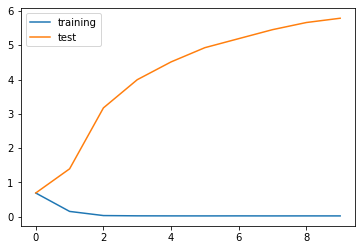

In [45]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    _ , y_pred = model(X_test)
    score = accuracy_score(y_test, y_pred)
    print(score)

0.6145833333333334
